![Portada](/Users/luna/Desktop/PALABRAS-CLAVES-5-MINUTES-CRAFTS/src/utils/Foto_EDA.png)

# PALABRAS CLAVES QUE IMPULSAN EL ÉXITO: UN ESTUDIO DE 5-MINUTE CRAFTS

## TEMA

Este proyecto se centra en analizar la **influencia de las palabras clave utilizadas en los títulos de los videos de 5-Minute Crafts** en el **número total de visitas** que reciben. 5-Minute Crafts es un canal de YouTube conocido por sus videos de estilo *"Do It Yourself (DIY)*" y es uno de los canales más populares en la plataforma. A través de un análisis exhaustivo, examinaré cómo ciertas palabras en los títulos pueden atraer más atención y generar un mayor número de visitas.

## HIPÓTESIS

##### Hipótesis principal:
El uso de ciertas palabras clave en los títulos de los videos de 5-Minute Crafts está correlacionado con un mayor número de visitas totales.Es decir, algunas palabras específicas pueden atraer más atención y generar más visitas.

##### Otras hipótesis:

* El número de caracteres del título de un video está correlacionado con el número de visitas que recibe.
* Los titulos que empiezan por dígito tienen menos visitas que los títulos que no contienen dígitos.
* Existe una correlación entre la duración de un video con el número total de visitas que recibe.
* Los títulos que están escritos completamente en mayúscula, tienen más visitas que los títulos que combinan mayúsculas y minusculas.
* El sentimiento del título puede influir en el número de visitas.

## Importar librerias

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Cargar datos

In [152]:
five_minute_crafts = pd.read_csv(filepath_or_buffer="/Users/luna/Desktop/posibles/5-Minute Crafts.csv")

## Primera exploración

In [153]:
five_minute_crafts.head() #Proporciona una vista previa de los 5 primeros registros

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=XHTofu5wbbM,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444
1,v=HGxx0umIQvk,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905
2,v=Tt4RMk3Ih04,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000
3,v=A2MTydM5e58,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333
4,v=_halJ4yrmGQ,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000


In [154]:
five_minute_crafts.dtypes #tipos de datos 

video_id                object
title                   object
active_since_days        int64
duration_seconds         int64
total_views              int64
num_chars                int64
num_words                int64
num_punctuation          int64
num_words_uppercase      int64
num_words_lowercase      int64
num_stopwords            int64
avg_word_len           float64
contain_digits           int64
startswith_digits        int64
title_sentiment        float64
dtype: object

In [155]:
five_minute_crafts.info() #visión general, incluyendo la cantidad de datos no nulos y el tipo de dato de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             4978 non-null   object 
 1   title                4978 non-null   object 
 2   active_since_days    4978 non-null   int64  
 3   duration_seconds     4978 non-null   int64  
 4   total_views          4978 non-null   int64  
 5   num_chars            4978 non-null   int64  
 6   num_words            4978 non-null   int64  
 7   num_punctuation      4978 non-null   int64  
 8   num_words_uppercase  4978 non-null   int64  
 9   num_words_lowercase  4978 non-null   int64  
 10  num_stopwords        4978 non-null   int64  
 11  avg_word_len         4978 non-null   float64
 12  contain_digits       4978 non-null   int64  
 13  startswith_digits    4978 non-null   int64  
 14  title_sentiment      4978 non-null   float64
dtypes: float64(2), int64(11), object(2)
me

In [156]:
five_minute_crafts.describe() #estadísticas descriptivas

,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
count,4978.000000,4978.000000,4.978000e+03,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000
mean,827.808759,932.421655,4.349619e+06,44.456408,8.208718,0.495982,6.138610,0.287264,2.050020,5.463782,0.913821,0.856770,0.225993
std,426.975866,727.392576,9.936944e+06,13.470281,2.516098,0.901010,2.546744,1.355098,1.373312,0.662885,0.280657,0.350343,0.377586
min,1.000000,11.000000,4.034000e+03,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.666667,0.000000,0.000000,-1.000000
25%,365.000000,696.000000,5.679352e+05,35.000000,6.000000,0.000000,5.000000,0.000000,1.000000,5.000000,1.000000,1.000000,0.000000
50%,730.000000,867.000000,1.459397e+06,43.000000,8.000000,0.000000,6.000000,0.000000,2.000000,5.375000,1.000000,1.000000,0.200000
75%,1095.000000,960.000000,4.271779e+06,52.000000,10.000000,1.000000,8.000000,0.000000,3.000000,5.800000,1.000000,1.000000,0.450000
max,1460.000000,14880.000000,2.830311e+08,100.000000,20.000000,6.000000,18.000000,12.000000,9.000000,10.000000,1.000000,1.000000,1.000000


In [157]:
five_minute_crafts.shape #número de filas y columnas

(4978, 15)

In [158]:
five_minute_crafts.columns #Lista todas las columnas

Index(['video_id', 'title', 'active_since_days', 'duration_seconds',
       'total_views', 'num_chars', 'num_words', 'num_punctuation',
       'num_words_uppercase', 'num_words_lowercase', 'num_stopwords',
       'avg_word_len', 'contain_digits', 'startswith_digits',
       'title_sentiment'],
      dtype='object')

In [159]:
five_minute_crafts.nunique() #la cantidad de valores únicos en cada columna

video_id               4978
title                  4965
active_since_days        31
duration_seconds        663
total_views            4978
num_chars                87
num_words                18
num_punctuation           7
num_words_uppercase      17
num_words_lowercase      13
num_stopwords            10
avg_word_len            254
contain_digits            2
startswith_digits         2
title_sentiment         339
dtype: int64

Después de una primera exploración de mis datos puedo sacar las siguientes conclusiones:
* Tengo un Data Frame con 4978 filas y 15 columnas.
* El Data Frame combina diferentes tipos de datos.
* Las columnas 'contain_digits' y 'startswith_digits' devuelve valores True/False

## Cardinalidad

En mi primera exploración, he observado que este Data Frame parece que no incluye valores nulos. Sin embargo, voy a comprobarlo:

In [160]:
null_values = five_minute_crafts.isnull().sum()
null_values

video_id               0
title                  0
active_since_days      0
duration_seconds       0
total_views            0
num_chars              0
num_words              0
num_punctuation        0
num_words_uppercase    0
num_words_lowercase    0
num_stopwords          0
avg_word_len           0
contain_digits         0
startswith_digits      0
title_sentiment        0
dtype: int64

In [161]:
def calculating_cardinality(five_minute_crafts):
    results = []
    for column in five_minute_crafts.columns:
        cardinality = five_minute_crafts[column].nunique()
        cardinality_percentage = cardinality / len(five_minute_crafts)
        data_types = five_minute_crafts[column].dtypes
        variable_types = 'Cualitativa' if five_minute_crafts[column].dtypes == 'object' else 'Cuantitativa'

        results.append({
            "Columna": column,
            "Cardinalidad": cardinality,
            "Porcentaje de Cardinalidad": cardinality_percentage,
            "Tipo de Datos": data_types,
            "Tipo de Variable": variable_types
        })
    
    return pd.DataFrame(results)


In [162]:
calculating_cardinality(five_minute_crafts)

,Columna,Cardinalidad,Porcentaje de Cardinalidad,Tipo de Datos,Tipo de Variable
0,video_id,4978,1.000000,object,Cualitativa
1,title,4965,0.997389,object,Cualitativa
2,active_since_days,31,0.006227,int64,Cuantitativa
3,duration_seconds,663,0.133186,int64,Cuantitativa
4,total_views,4978,1.000000,int64,Cuantitativa
5,num_chars,87,0.017477,int64,Cuantitativa
6,num_words,18,0.003616,int64,Cuantitativa
7,num_punctuation,7,0.001406,int64,Cuantitativa
8,num_words_uppercase,17,0.003415,int64,Cuantitativa
9,num_words_lowercase,13,0.002611,int64,Cuantitativa


### Clasificación de las variables de mis hipótesis para saber cómo trabajar con ellas:

* Hipótesis Principal: Palabras "clave" (**Variable Independientes Cualitativa**) y total de visitas total de visitas (**Variable Dependiente Cuantitativa**)
* Hipótesis 1: Número de caracteres del título (**Variable Independientes Cualitativa**) y total de visitas (**Variable Dependiente Cuantitativa**)
* Hipótesis 2: Títulos que empiezan por dígito (Variable Independiente Cuantitativa al ser 0 y 1, pero es un forma de expresar True y False, por lo realmente se trata de un **Variable Cualitativa Independiente**) y total de visitas (**Variable Dependiente Cuantitativa**)
* Hipótesis 3: Duración del vídeo (**Variable Cuantitativa Independiente**) total de visitas (**Variable Dependiente Cuantitativa**)
* Hipótesis 4: Los títulos que están escritos completamente en mayúscula (**Variable Cualitativa Independiente (T/F)**), tienen más visitas (**Variable Dependiente Cuantitativa**) que los títulos que combinan mayúsculas y minusculas.
* Hipótesis 5: El sentimiento del título (**Variable Cuantitativa Independiente**) y total de visitas (**Variable Dependiente Cuantitativa**)

### Notas con información de algunas columnas

* Active_since_days: vídeo activo desde x días
* Num_chars: caracteres totales del título del vídeo
* Num_words: total de palabras en el título del vídeo
* Num_punctuation: número de signos de puntuación
* Num_words_uppercase: número de palabras con todas las letras en mayúscula
* Num_words_lowercase: número de palabras con todas las letras en minúscula
* Num_stopwords: "palabras vacías".Estas palabras suelen ser preposiciones, conjunciones, artículos y otros términos muy frecuentes en un idioma. Ejem: the, and,is,in,of...
* Avg_word_len: longitud media de la palabra
* Contain_digits: el título contiene dígitos
* Startswith_digits: el título empieza por un dígito
* Title_sentiment: sentimiento del título del vídeo.  Significa lo positivo o negativo que es el título.

Más adelante añadiré otras columnas conforme vaya necesitando para hacer el análisis.

In [163]:
five_minute_crafts

,video_id,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,v=XHTofu5wbbM,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444
1,v=HGxx0umIQvk,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905
2,v=Tt4RMk3Ih04,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000
3,v=A2MTydM5e58,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333
4,v=_halJ4yrmGQ,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,v=RA9GjoRhcSE,Amazing life hack; how to recycle old crayons ...,1460,55,76086,63,11,2,2,8,2,5.727273,1,0,0.350000
4974,v=KtetRv4kfog,How to DIY a magnetic memo holder l 5-MINUTE C...,1460,52,68908,51,10,1,3,6,3,5.100000,1,0,0.000000
4975,v=AEp338eSyDM,How to turn your old T-shirt into a pillowcase...,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000
4976,v=JmFQavE0sPM,3 tricks to clean without harsh chemicals l 5-...,1460,81,93121,59,10,1,2,7,1,5.900000,1,1,0.083333


## Limpieza

Ya he calculado previamente si existen valores nulos en mi Data Frame y el resultado ha sido 0, por lo que paso directamente al manejo de outliers.

### Manejo de outliers

##### Total de visitas (total_views)

Esto permite ver cómo se distribuyen las visitas entre los diferentes vídeos y detectar si hay algunos con un número extraordinariamente alto o bajo de visitas.

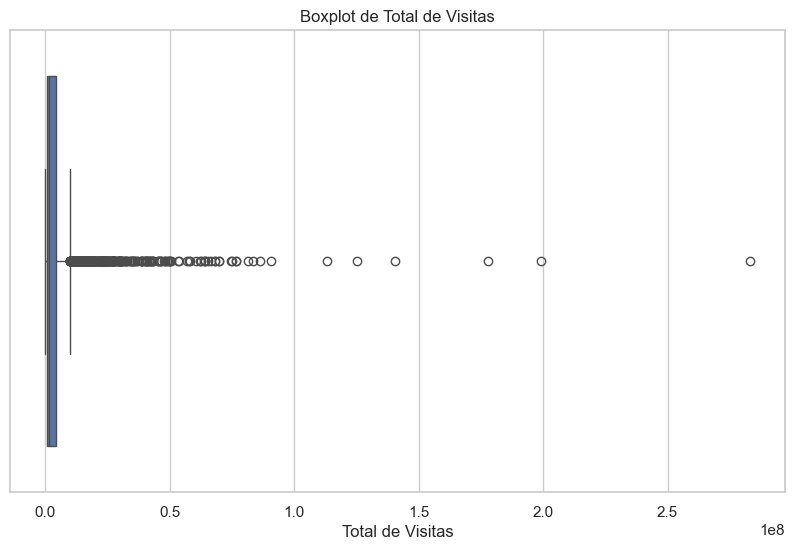

In [164]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=five_minute_crafts['total_views'])
plt.title('Boxplot de Total de Visitas')
plt.xlabel('Total de Visitas')
plt.show()


Podemos decir que aunque la mayoría de los videos tienen un número de visitas relativamente moderado, hay ciertos videos que son excepcionalmente populares. 

##### Duración de los vídeos (duration_seconds)

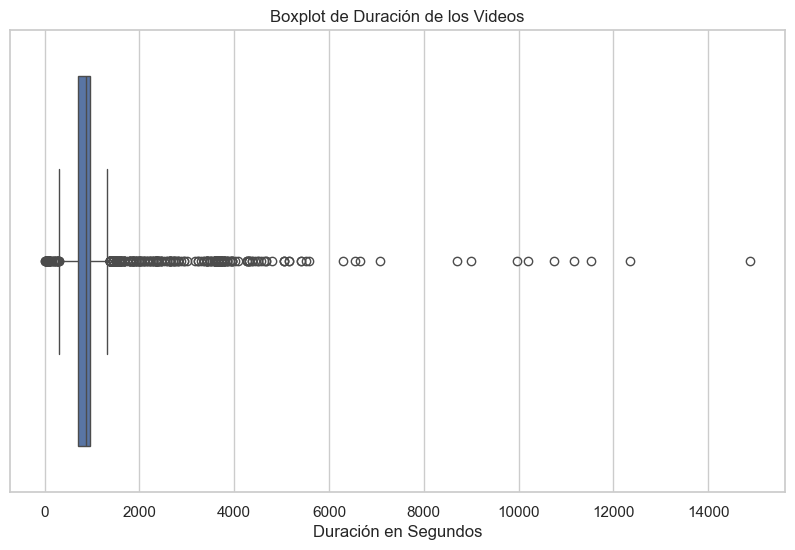

In [165]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=five_minute_crafts['duration_seconds'])
plt.title('Boxplot de Duración de los Videos')
plt.xlabel('Duración en Segundos')
plt.show()

La duración de los vídeos es asimétrica, tendiendo a haber outliers de mayor duración (la línea dentro de la caja es la mediana de la duración de los vídeos y tiende a la derecha)

##### Longitud del título (num_chars)(num_words)

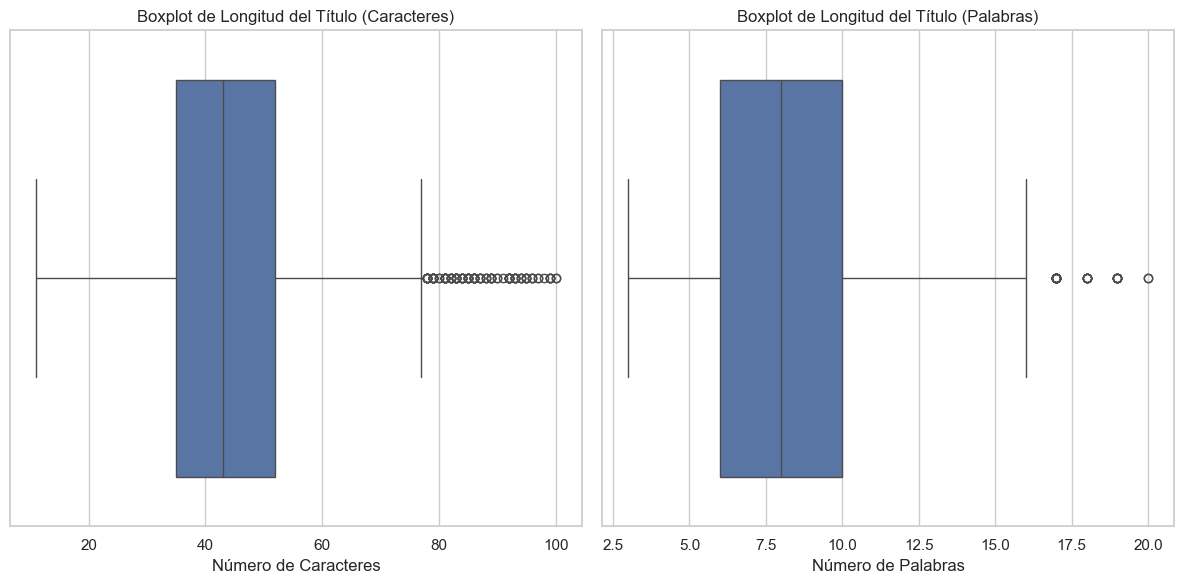

In [166]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=five_minute_crafts['num_chars'])
plt.title('Boxplot de Longitud del Título (Caracteres)')
plt.xlabel('Número de Caracteres')

plt.subplot(1, 2, 2)
sns.boxplot(x=five_minute_crafts['num_words'])
plt.title('Boxplot de Longitud del Título (Palabras)')
plt.xlabel('Número de Palabras')

plt.tight_layout() #método para ajustar el tamaño y quede centrado
plt.show()


La mayoría de títulos tienes una longitud muy similar (mediana). Sin embargo, hay algunos videos con títulos significativamente diferentes en longitud a lo que es típico en el canal (tienden a ser más largos de lo normal)

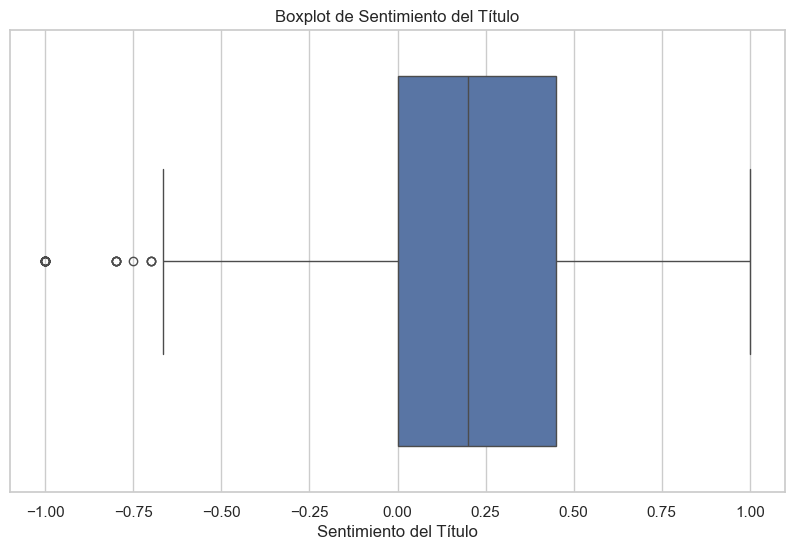

In [167]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=five_minute_crafts['title_sentiment'])
plt.title('Boxplot de Sentimiento del Título')
plt.xlabel('Sentimiento del Título')
plt.show()

Parece que la mayoría de los títulos tienen un sentimiento neutral. Aunque en algunos casos hay vídeos que provocan un sentimiento negativo más extremo.

#### Comprobar si hay filas repetidas

In [168]:
repeated_rows= five_minute_crafts.duplicated()
repeated_rows


0       False
1       False
2       False
3       False
4       False
        ...  
4973    False
4974    False
4975    False
4976    False
4977    False
Length: 4978, dtype: bool

In [169]:
total_repeated_rows= repeated_rows.sum()
print(f'Total de filas repetidas: {total_repeated_rows}')

Total de filas repetidas: 0


#### Reemplazar ' l ' por ' | ' y volver a contar las minúsculas

La columna de 'num_words_lowercase' no cuenta correctamente las palabras en minúscula porque confunde la 'l' por este símbolo '|'. Por eso, he hecho uan función que hace un reemplazo y vuelve a contar.

In [170]:
five_minute_crafts['title'] = five_minute_crafts['title'].str.replace(' l ', ' | ')

In [171]:
def contar_minusculas(texto):
    return sum(1 for palabra in texto.split() if palabra[0].islower())

In [172]:
five_minute_crafts['num_words_lowercase'] = five_minute_crafts['title'].apply(contar_minusculas)

In [173]:
five_minute_crafts[['title','num_words_lowercase']]

,title,num_words_lowercase
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,0
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,0
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,0
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,0
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,0
...,...,...
4973,Amazing life hack; how to recycle old crayons ...,7
4974,How to DIY a magnetic memo holder | 5-MINUTE C...,5
4975,How to turn your old T-shirt into a pillowcase...,7
4976,3 tricks to clean without harsh chemicals | 5-...,6


#### Borrar filas irrelevantes

A priori solo voy a borrar la columna de 'video_id' ya que corresponde a los enlaces de los vídeos, los cuales no necesito.

In [174]:
five_minute_crafts.drop('video_id', axis=1, inplace=True)
five_minute_crafts = five_minute_crafts.reset_index(drop=True)

In [175]:
five_minute_crafts

,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Amazing life hack; how to recycle old crayons ...,1460,55,76086,63,11,2,2,7,2,5.727273,1,0,0.350000
4974,How to DIY a magnetic memo holder | 5-MINUTE C...,1460,52,68908,51,10,1,3,5,3,5.100000,1,0,0.000000
4975,How to turn your old T-shirt into a pillowcase...,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000
4976,3 tricks to clean without harsh chemicals | 5-...,1460,81,93121,59,10,1,2,6,1,5.900000,1,1,0.083333


#### Guardar nuevo dataframe

In [176]:
five_minute_crafts.to_csv('clean_five_minute_crafts.csv',index=False)

In [177]:
five_minute_crafts

,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Amazing life hack; how to recycle old crayons ...,1460,55,76086,63,11,2,2,7,2,5.727273,1,0,0.350000
4974,How to DIY a magnetic memo holder | 5-MINUTE C...,1460,52,68908,51,10,1,3,5,3,5.100000,1,0,0.000000
4975,How to turn your old T-shirt into a pillowcase...,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000
4976,3 tricks to clean without harsh chemicals | 5-...,1460,81,93121,59,10,1,2,6,1,5.900000,1,1,0.083333


# Análisis

# Hipótesis Principal:El uso de ciertas palabras clave en los títulos de los videos de 5-Minute Crafts está correlacionado con un mayor número de visitas totales.Es decir, algunas palabras específicas pueden atraer más atención y generar más visitas.

Identificación de las palabras más usadas en los títulos:

In [178]:
# Tokenizar los títulos usando split() y contar la frecuencia de cada palabra:
# split(): divide una cadena en una lista de subcadenas 
# Si no usas expand=True, te devolvería una serie de lista en vez de un df donde cada palabra de un título ocupa una columna diferente.
# stack(): apila las columnas del df en una sola columna para que puedan ser sumadas
frecuencia_de_palabra= five_minute_crafts['title'].str.split(expand=True).stack().value_counts()

# Obtener las 20 palabras más comunes
top_20_words = frecuencia_de_palabra.head(20)

# Imprimir las 20 palabras más comunes
print(top_20_words)


HACKS     2204
TO        1170
YOU        961
YOUR       862
AND        849
LIFE       791
FOR        745
THAT       629
||         552
IDEAS      528
25         426
DIY        424
CRAFTS     409
TRICKS     372
MAKE       369
WILL       359
EASY       325
20         324
COOL       286
30         280
Name: count, dtype: int64


Las 3 palabras que más se repiten en los títulos es 'Hacks','Life' e 'Ideas'. Hay otras palabras que también se repiten con bastante o incluso mayor frecuencia, pero se tratra de palabras vacías como 'to','you','your','and'...por lo que las descartaré para el análisis.

Primero me centraré en analizar la palabra más repetida en los títulos: **'Hacks'**. Para ello, voy a crear una nueva columna T/F de los vídeos que tengan o no esta palabra:

In [179]:
five_minute_crafts['contains_hacks'] = five_minute_crafts['title'].str.contains('Hacks', case=False, regex=False)
five_minute_crafts

,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment,contains_hacks
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444,True
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905,True
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000,True
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333,True
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Amazing life hack; how to recycle old crayons ...,1460,55,76086,63,11,2,2,7,2,5.727273,1,0,0.350000,False
4974,How to DIY a magnetic memo holder | 5-MINUTE C...,1460,52,68908,51,10,1,3,5,3,5.100000,1,0,0.000000,False
4975,How to turn your old T-shirt into a pillowcase...,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000,False
4976,3 tricks to clean without harsh chemicals | 5-...,1460,81,93121,59,10,1,2,6,1,5.900000,1,1,0.083333,False


In [180]:
print(five_minute_crafts.columns)


Index(['title', 'active_since_days', 'duration_seconds', 'total_views',
       'num_chars', 'num_words', 'num_punctuation', 'num_words_uppercase',
       'num_words_lowercase', 'num_stopwords', 'avg_word_len',
       'contain_digits', 'startswith_digits', 'title_sentiment',
       'contains_hacks'],
      dtype='object')


Proporción de vídeos que contienen la palabra 'hacks': 

In [181]:
proporcion_con_hacks = five_minute_crafts['contains_hacks'].mean()
proporcion_con_hacks

0.48372840498192043

Visitas promedio en vídeos con o sin la palabra 'hacks'

In [182]:
visitas_promedio_con_hacks = five_minute_crafts[five_minute_crafts['contains_hacks']]['total_views'].mean()
visitas_promedio_sin_hacks = five_minute_crafts[~five_minute_crafts['contains_hacks']]['total_views'].mean() #~ se utiliza como operador de negación con booleanos
print(f'Las visitas promedio de los vídeos que incluye la palabra hacks es de {visitas_promedio_con_hacks}')
print(f'Las visitas promedio de los vídeos que no incluyen la palabra hacks es de {visitas_promedio_sin_hacks}')

Las visitas promedio de los vídeos que incluye la palabra hacks es de 5204975.742524917
Las visitas promedio de los vídeos que no incluyen la palabra hacks es de 3548180.0334630352


/var/folders/0t/vk49bpws5t71r094zjj6qc400000gn/T/ipykernel_9617/4284174205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contains_hacks', y='total_views', data=grouped_visits, palette='viridis')


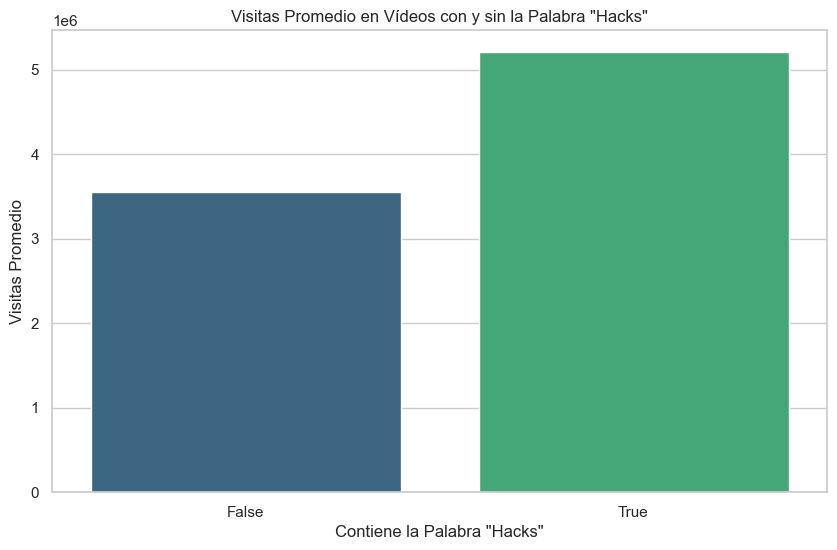

In [183]:
# Visitas promedio por grupo
grouped_visits = five_minute_crafts.groupby('contains_hacks')['total_views'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='contains_hacks', y='total_views', data=grouped_visits, palette='viridis')
plt.xlabel('Contiene la Palabra "Hacks"')
plt.ylabel('Visitas Promedio')
plt.title('Visitas Promedio en Vídeos con y sin la Palabra "Hacks"')
plt.show()


Comprobar el supuesto de normalidad de la **variable dependiente**.
Esto se calcula con la Prueba de Kolmogorov-Smirnov (muestras mayores de 50) o Prueba de Shapiro-Wilk (muestras menores de 50)

In [184]:
from scipy.stats import kstest
ks_statistic, p_value = kstest(five_minute_crafts['total_views'], 'norm')
print(f"Estadístico KS: {ks_statistic}")
print(f"Valor P: {p_value}")

Estadístico KS: 1.0
Valor P: 0.0


Mi distribución no es normal porque Valor P es menor a 0,05. Es decir, voy a tener que hacer pruebas NO paramétricas siempre que la variable dependiente de mi hipótesis sea 'total_views'

Prueba U Mann-Whitney

In [185]:
from scipy.stats import mannwhitneyu
visitas_con_hacks = five_minute_crafts[five_minute_crafts['contains_hacks']]['total_views']
visitas_sin_hacks = five_minute_crafts[~five_minute_crafts['contains_hacks']]['total_views']
u_statistic, p_value = mannwhitneyu(visitas_con_hacks, visitas_sin_hacks, alternative='two-sided')
print('U Statistic:', u_statistic)
print('P-Value:', p_value)


U Statistic: 3575606.0
P-Value: 2.125510865655143e-21


Se puede afirmar que existe una asociación significativa entre la presencia de la palabra 'hacks' en el título y un mayor número de visitas.


Repito el mismo proceso con la segunda palabras más repetida: **'Life'**.

In [186]:
five_minute_crafts['contains_life'] = five_minute_crafts['title'].str.contains('Life', case=False, regex=False)
five_minute_crafts

,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment,contains_hacks,contains_life
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444,True,True
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905,True,False
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000,True,True
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333,True,False
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,Amazing life hack; how to recycle old crayons ...,1460,55,76086,63,11,2,2,7,2,5.727273,1,0,0.350000,False,True
4974,How to DIY a magnetic memo holder | 5-MINUTE C...,1460,52,68908,51,10,1,3,5,3,5.100000,1,0,0.000000,False,False
4975,How to turn your old T-shirt into a pillowcase...,1460,62,118541,76,14,5,4,7,5,5.428571,1,0,0.100000,False,False
4976,3 tricks to clean without harsh chemicals | 5-...,1460,81,93121,59,10,1,2,6,1,5.900000,1,1,0.083333,False,False


In [187]:
proporcion_con_life = five_minute_crafts['contains_life'].mean()
print(f'El promedio de los títulos que usan la palabra LIFE es de {proporcion_con_life}')

El promedio de los títulos que usan la palabra LIFE es de 0.17959019686621133


In [188]:
visitas_promedio_con_life = five_minute_crafts[five_minute_crafts['contains_life']]['total_views'].mean()
visitas_promedio_sin_life = five_minute_crafts[~five_minute_crafts['contains_life']]['total_views'].mean()
print(f'Las visitas promedio de los títulos que usan la palabra LIFE es de {visitas_promedio_con_life}')
print(f'Las visitas promedio de los títulos no que usan la palabra LIFE es de {visitas_promedio_sin_life}')


Las visitas promedio de los títulos que usan la palabra LIFE es de 5446305.610738255
Las visitas promedio de los títulos no que usan la palabra LIFE es de 4109551.1895200782


/var/folders/0t/vk49bpws5t71r094zjj6qc400000gn/T/ipykernel_9617/3015925242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contains_life', y='total_views', data=grouped_visits, palette='colorblind')


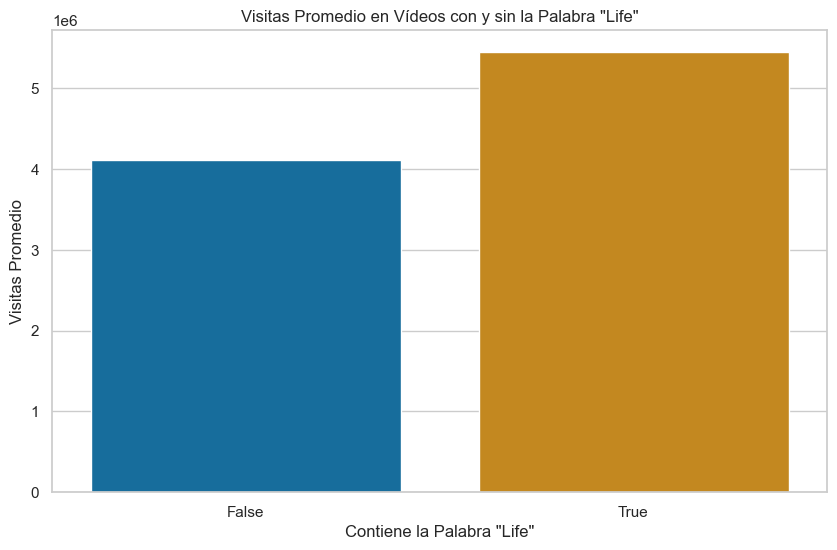

In [189]:
grouped_visits = five_minute_crafts.groupby('contains_life')['total_views'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='contains_life', y='total_views', data=grouped_visits, palette='colorblind')
plt.xlabel('Contiene la Palabra "Life"')
plt.ylabel('Visitas Promedio')
plt.title('Visitas Promedio en Vídeos con y sin la Palabra "Life"')
plt.show()

In [190]:
visitas_con_life = five_minute_crafts[five_minute_crafts['contains_life']]['total_views']
visitas_sin_life = five_minute_crafts[~five_minute_crafts['contains_life']]['total_views']
u_statistic, p_value = mannwhitneyu(visitas_con_life, visitas_sin_life, alternative='two-sided')
print('U Statistic:', u_statistic)
print('P-Value:', p_value)


U Statistic: 2000662.0
P-Value: 6.823538262937472e-06


Hay una diferencia estadísticamente significativa entre el número de visitas para los videos que contienen la palabra "Life" en el título y aquellos que no la contienen. 

Vuelvo a repetir el mismo procedimiento con la tercera palabras más usada: **'Ideas'**.

In [191]:
five_minute_crafts['contains_ideas'] = five_minute_crafts['title'].str.contains('Ideas', case=False, regex=False)
five_minute_crafts.head()

,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment,contains_hacks,contains_life,contains_ideas
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444,True,True,False
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905,True,False,True
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000,True,True,False
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333,True,False,False
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000,True,False,False


In [192]:
proporcion_con_ideas= five_minute_crafts['contains_ideas'].mean()
print(f'El promedio de los títulos que usan la palabra IDEAS es de {proporcion_con_ideas}')

El promedio de los títulos que usan la palabra IDEAS es de 0.13157894736842105


In [193]:
visitas_promedio_con_ideas = five_minute_crafts[five_minute_crafts['contains_ideas']]['total_views'].mean()
visitas_promedio_sin_ideas= five_minute_crafts[~five_minute_crafts['contains_ideas']]['total_views'].mean()
print(f'Las visitas promedio de los títulos que usan la palabra IDEAS es de {visitas_promedio_con_ideas}')
print(f'Las visitas promedio de los títulos no que usan la palabra IDEAS es de {visitas_promedio_sin_ideas}')

Las visitas promedio de los títulos que usan la palabra IDEAS es de 3406654.0259541986
Las visitas promedio de los títulos no que usan la palabra IDEAS es de 4492492.687254221


/var/folders/0t/vk49bpws5t71r094zjj6qc400000gn/T/ipykernel_9617/1673770891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contains_ideas', y='total_views', data=grouped_visits, palette='plasma')


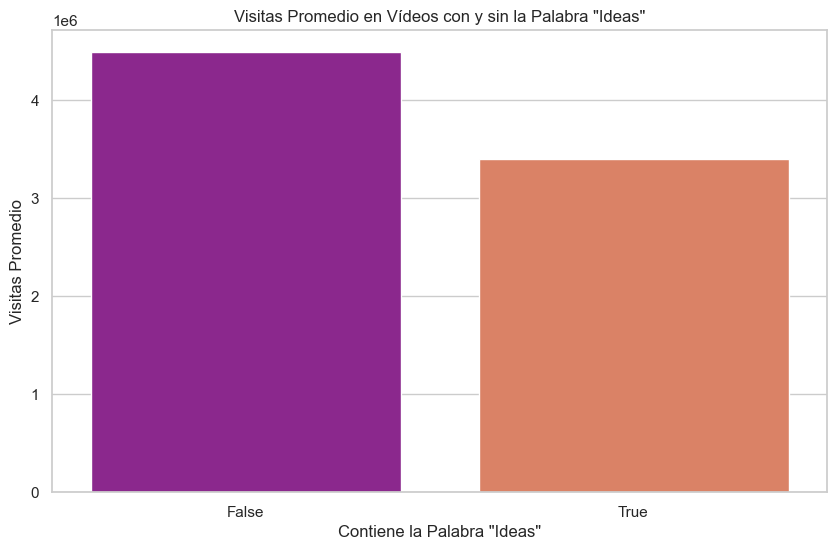

In [194]:
grouped_visits = five_minute_crafts.groupby('contains_ideas')['total_views'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='contains_ideas', y='total_views', data=grouped_visits, palette='plasma')
plt.xlabel('Contiene la Palabra "Ideas"')
plt.ylabel('Visitas Promedio')
plt.title('Visitas Promedio en Vídeos con y sin la Palabra "Ideas"')
plt.show()

In [195]:
visitas_con_ideas = five_minute_crafts[five_minute_crafts['contains_ideas']]['total_views']
visitas_sin_ideas = five_minute_crafts[~five_minute_crafts['contains_ideas']]['total_views']
u_statistic, p_value = mannwhitneyu(visitas_con_ideas, visitas_sin_ideas, alternative='two-sided')
print('U Statistic:', u_statistic)
print('P-Value:', p_value)

U Statistic: 1366694.0
P-Value: 0.15210738668538093


El p-valor obtenido es mayor que el umbral comúnmente aceptado de 0.05 para significancia estadística. Esto significa que no hay suficiente evidencia para rechazar la hipótesis nula de que no hay diferencia en el número de visitas entre los dos grupos.

## Conclusiones

Los datos apoyan la hipótesis de que ciertas palabras clave en los títulos están correlacionadas con un mayor número de visitas para las palabras 'hacks' y 'life', la primera y la segunda palabras más repetida en los titúlos. Sin embargo, esto no se cumple en la tercera palabra más repetida, 'ideas'. Por lo que esto sugiere que algunas palabras pueden atraer más atención y generar más visitas, pero esta regla no es universal para todas las palabras.

Es importante recordar que la correlación no implica causalidad. Aunque las palabras 'hacks' y 'life' parecen estar asociadas con un mayor número de visitas, esto no significa necesariamente que estas palabras sean la causa directa del aumento de visitas. Puede haber otros factores en juego que también afecten al número de visitas de los vídeos.

Además, hay que señalar que en este análisis recoge las palabras escritas tato en mayúscula como minúscula (Ejem: 'Hacks',HACKS'), pero no cuenta las palabras en plural (Ejem: 'Hacks','Hack)

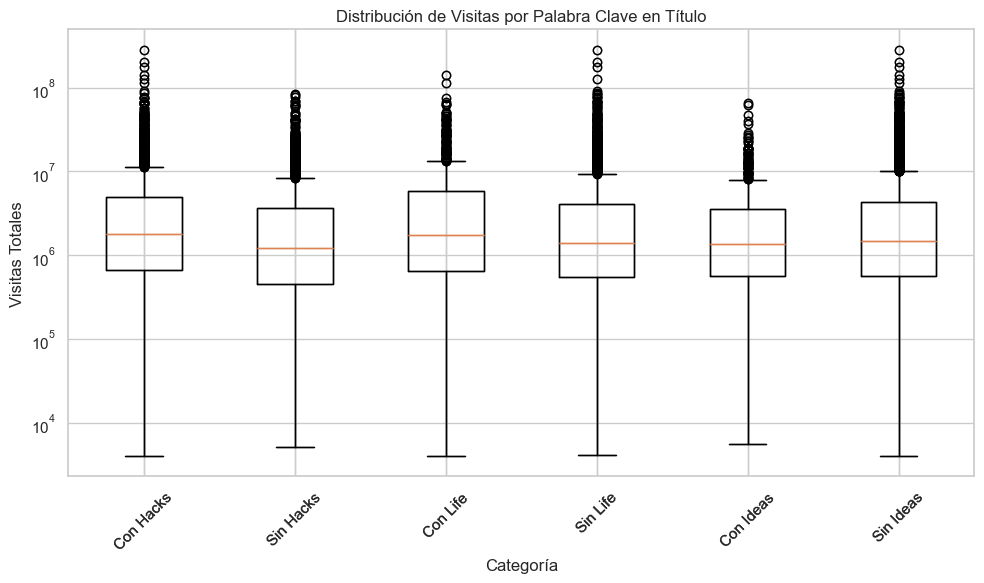

In [196]:
import matplotlib.pyplot as plt

# Crear un boxplot para cada grupo de palabras clave
data_to_plot = [visitas_con_hacks, visitas_sin_hacks,
                visitas_con_life, visitas_sin_life,
                visitas_con_ideas, visitas_sin_ideas]
labels = ['Con Hacks', 'Sin Hacks',
          'Con Life', 'Sin Life',
          'Con Ideas', 'Sin Ideas']


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribución de Visitas por Palabra Clave en Título')
ax.set_xlabel('Categoría')
ax.set_ylabel('Visitas Totales')

ax.boxplot(data_to_plot, labels=labels)

# Mostrar los outliers con un marcador diferente
ax.boxplot(data_to_plot, labels=labels, flierprops=dict(marker='o', color='r', alpha=0.5))

plt.xticks(rotation=45)  # Rotar las etiquetas para mejor legibilidad
plt.yscale('log')        # Usar escala logarítmica si hay valores muy altos

plt.tight_layout()  # Ajusta automáticamente los parámetros para que quepa todo
plt.show()


**Con Hacks vs. Sin Hacks**: Parece haber una diferencia notable en la distribución de las visitas totales entre los videos que contienen la palabra 'hacks' y los que no. Los videos con 'hacks' muestran una mediana más alta de visitas y un rango intercuartílico más amplio, lo que sugiere que tienden a tener más visitas en general. Esto respalda la idea de que 'hacks' es una palabra clave que atrae más visitas.

**Con Life vs. Sin Life**: También hay una diferencia visible en las visitas totales entre los videos con la palabra 'life' y los que no la incluyen, aunque parece menos pronunciada que la observada con 'hacks'. Aún así, la mediana de visitas para los videos con 'life' es ligeramente superior a la de los videos sin ella, lo que puede sugerir una tendencia de que 'life' también atrae más visitas.

**Con Ideas vs. Sin Ideas**: Las diferencias en las visitas totales para los videos con y sin la palabra 'ideas' no son tan claras como con 'hacks' y 'life'. Las medianas de visitas parecen ser muy similares, y los rangos intercuartílicos se superponen considerablemente. Esto se alinea con el resultado del test estadístico que indicó que no hay una diferencia significativa en las visitas entre estos dos grupos.

En todos los casos, observamos algunos outliers los cuales representan vídeos que tienen un número de visitas excepcionalmente diferente en comparación con el resto de su grupo. Además, debido al gran número de valores, es recomendable el uso de la escala logarítmica en el eje de las visitas totales para que sea más fácil ver las diferencias entre las medianas de los grupos.

# Hipótesis 1:  El número de caracteres del título de un video está correlacionada con el número de visitas que recibe

In [197]:
from scipy.stats import spearmanr
coeficiente_spearman, valor_p = spearmanr(five_minute_crafts['num_chars'],five_minute_crafts['total_views'])
print("Coeficiente de Spearmen:", coeficiente_spearman)
print("Valor p:", valor_p)

Coeficiente de Spearmen: -0.0833691044402616
Valor p: 3.841392417288978e-09


Al ser el coeficiente de Spearmen negativo, significa que, en general, a medida que aumenta la longitud del título, hay una tendencia a que el número de visitas disminuya. Sin embargo, la fuerza de esta relación es débil, ya que el coeficiente está cerca de 0.

El valor p es menor a 0,05, por lo que hay significancia.

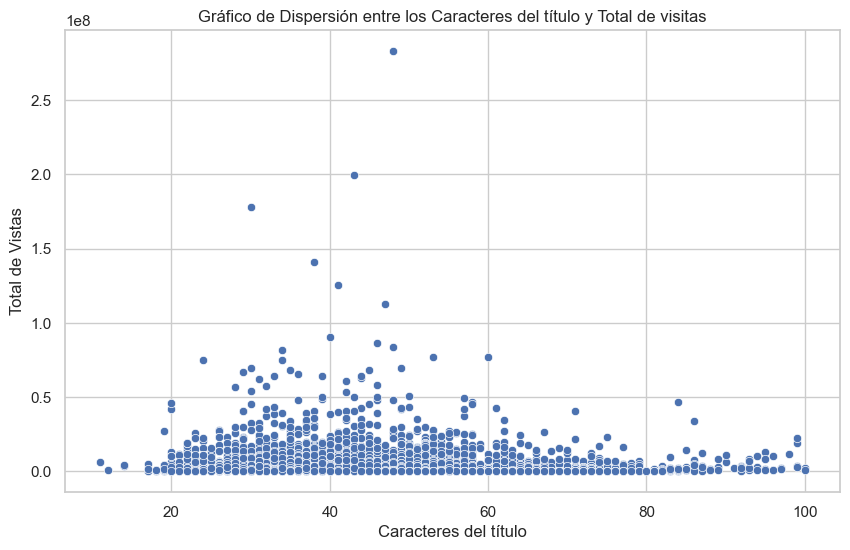

In [198]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_chars', y='total_views', data=five_minute_crafts)
plt.title('Gráfico de Dispersión entre los Caracteres del título y Total de visitas')
plt.xlabel('Caracteres del título')
plt.ylabel('Total de Vistas')
plt.show()

La mayoría de los puntos se concentran en la parte inferior del gráfico, es decir, la mayoría de los vídeos tienen una cantidad de visitas baja independientemente del número de caracteres. Hay algunos puntos que representan vídeos con un número muy alto de visitas, que se pueden considerar valores atípicos. Estos valores atípicos con visitas muy altas no muestran una correlación clara con el número de caracteres. No hay una tendencia lineal clara en el gráfico, lo que respalda el coeficiente de correlación de Spearman que indica una correlación negativa débil.

## Conclusión:

Hay una relación estadísticamente significativa entre el número de caracteres del título y el número de visitas, aunque la fuerza de esta relación es débil. La dirección negativa de la correlación sugiere que títulos más largos podrían estar asociados con menos visitas, pero debido a que la correlación es débil, tenemos que tener en cuenta otros factores.

# Hipótesis 2: Los titulos que empiezan por dígito tienen menos visitas que los que no contienen dígitos

Calcular cuántos vídeos comienzan con un dígito y cuales no tienen ningún dígito:

In [199]:
# El .shape() devuelve una tupla donde el primer elemento es el número de filas y el segundo es el número de columnas del DataFrame o array.
# Por ejemplo, si tienes un DataFrame con 100 filas y 5 columnas, al hacer DataFrame.shape, obtendrás la tupla (100, 5).
total_startswith_digit = five_minute_crafts[five_minute_crafts['startswith_digits'] == 1].shape[0] # El [0] es el primer elemento de la tupla
total_no_digit = five_minute_crafts[five_minute_crafts['contain_digits'] == 0].shape[0]
print(f'Total de vídeos que comienzan con un dígito: {total_startswith_digit}')
print(f'Total de vídeos sin ningún dígito: {total_no_digit}')


Total de vídeos que comienzan con un dígito: 4265
Total de vídeos sin ningún dígito: 429


In [200]:
promedio_visitas_startswith_digit = five_minute_crafts[five_minute_crafts['startswith_digits'] == 1]['total_views'].mean()
promedio_visitas_no_digit = five_minute_crafts[five_minute_crafts['contain_digits'] == 0]['total_views'].mean()
print(f'Número promedio de visitas para vídeos que comienzan con un dígito: {promedio_visitas_startswith_digit:.0f}')
print(f'Número promedio de visitas para vídeos sin ningún dígito: {promedio_visitas_no_digit:.0f}')


Número promedio de visitas para vídeos que comienzan con un dígito: 4450767
Número promedio de visitas para vídeos sin ningún dígito: 4453422


Da un resultado bastante similar, por lo que podemos decir que no hay una gran diferencia en el número promedio de visitas entre los vídeos que comienzan con un dígito y los que no contienen ningún dígito.

In [201]:
visitas_startswith_digit = five_minute_crafts[five_minute_crafts['startswith_digits'] == 1]['total_views']
visitas_no_digit = five_minute_crafts[five_minute_crafts['contain_digits'] == 0]['total_views']
u_statistic, p_value = mannwhitneyu(visitas_startswith_digit, visitas_no_digit)
print(f'U Statistic: {u_statistic}')
print(f'P-Value: {p_value}')


U Statistic: 1034314.0
P-Value: 7.997000755135346e-06


/var/folders/0t/vk49bpws5t71r094zjj6qc400000gn/T/ipykernel_9617/107369906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=categorias, y=promedios, palette='pastel')


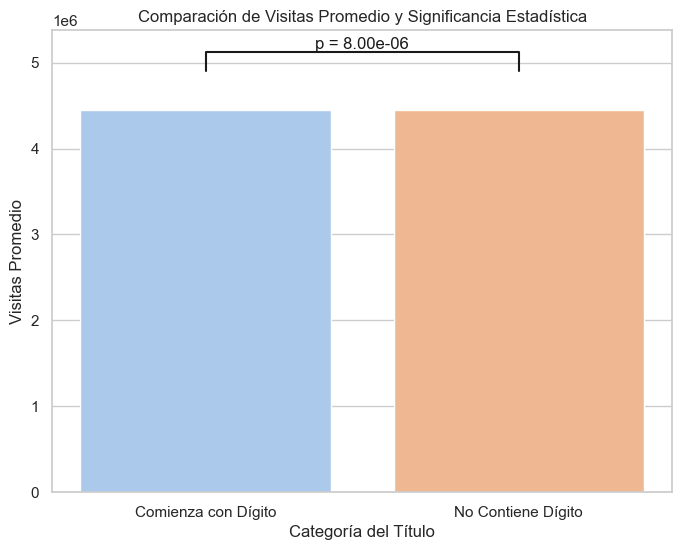

In [202]:
categorias = ['Comienza con Dígito', 'No Contiene Dígito']
promedios = [4450767, 4453422]  # Valores promedios
p_value = 7.997000755135346e-06  #P valor


plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=categorias, y=promedios, palette='pastel')
plt.xlabel('Categoría del Título')
plt.ylabel('Visitas Promedio')
plt.title('Comparación de Visitas Promedio y Significancia Estadística')

# Añadir la significancia estadística sobre las barras
x1, x2 = 0, 1  # Coordenadas de las barras
y, h, col = max(promedios) + max(promedios) * 0.1, max(promedios) * 0.05, 'k'  # Altura y color de la línea
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f'p = {p_value:.2e}', ha='center', va='bottom', color=col)

plt.show()


## Conclusión:

Aunque los promedios de visitas de ambos grupos eran muy similares, la prueba U de Mann-Whitney indica que hay una diferencia en las distribuciones de las visitas entre estos dos grupos. Esto podría respaldar la hipótesis de que existe una diferencia estadísticamente significativa en el número de visitas entre los vídeos que comienzan con un dígito y los que no contienen ningún dígito. Sin embargo, no sería del todo cierta ya que la media de visitas es casi idéntica para ambos grupos. Es necesario continuar haciendo más pruebas.

# Hipótesis 3: Existe una correlación entre la duración de un video con el número total de visitas que recibe.

Visualizar la distribución de la duración de los vídeos:

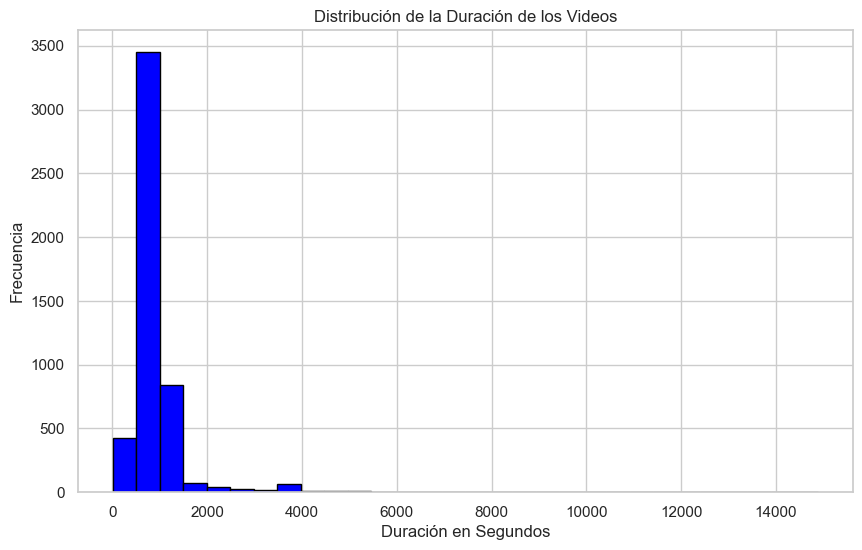

In [203]:
plt.figure(figsize=(10, 6))
plt.hist(five_minute_crafts['duration_seconds'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de la Duración de los Videos')
plt.xlabel('Duración en Segundos')
plt.ylabel('Frecuencia')
plt.show()

Hay una proporción más alta de videos con duraciones menores en comparación con duraciones más largas, y esto se refleja en la forma y la distribución de las barras. La cola se extiende más hacia el lado de las duraciones más largas (derecha) pero hay más barras (mayor frecuencia) en el lado de las duraciones más cortas, eso indica un sesgo hacia duraciones más cortas.

Como hay un número significativo de videos con duraciones mucho más largas que la mayoría, estos pueden aumentar la duración promedio considerablemente, incluso si la mayoría de los videos son más cortos. Además,si la distribución de la duración de los videos es sesgada hacia la derecha, la media será mayor que la mediana. La duración promedio (media) se ve influida por la cola larga de la distribución (videos más largos), mientras que la mayoría de los videos pueden tener duraciones más cortas.

In [204]:
from scipy.stats import spearmanr
coeficiente_spearman, valor_p = spearmanr(five_minute_crafts['duration_seconds'],five_minute_crafts['total_views'])
print("Coeficiente de Spearmen:", coeficiente_spearman)
print("Valor p:", valor_p)

Coeficiente de Spearmen: 0.15895495954957334
Valor p: 1.5732676699379523e-29


El coeficiente de Spearman indica una correlación positiva débil entre la duración del vídeo y el total de visitas. Esto significa que hay una tendencia ligera a que los videos más largos tengan un número ligeramente mayor de visitas. Además, el valor p es extremadamente bajo y muy por debajo del umbral convencional de 0.05, lo que indica que la correlación observada es estadísticamente significativa.

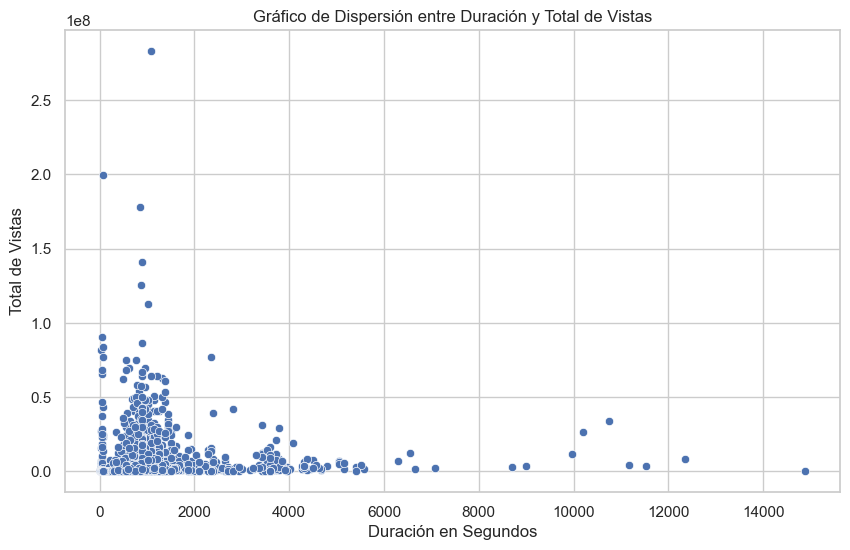

In [205]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='total_views', data=five_minute_crafts)
plt.title('Gráfico de Dispersión entre Duración y Total de Vistas')
plt.xlabel('Duración en Segundos')
plt.ylabel('Total de Vistas')
plt.show()


Hay muchos vídeos con una duración corta o media y la mayoría reciben un número de visitas moderado. Los videos con duraciones extremadamente largas son menos comunes.

## Conclusión:

Podemos decir que existe una correlación entre la duración de un vídeo y el número total de visitas que recibe, ya que los resultados estadísticos apoyan la idea de que hay una correlación positiva, aunque sea débil. Se podría significar que la hipótesis planteada. Sin embargo, la fuerza de esta relación es bastante baja por lo que habría que estudiar otros factores.

# Hipótesis 4: Los títulos que están escritos completamente en mayúscula, tienen más visitas que los títulos que combinan mayúsculas y minúsculas

Crear una nueva columna para que registre con True/False los títulos en los que todas las palabras estén en mayúscula:

In [206]:
five_minute_crafts['all_words_uppercase'] = five_minute_crafts['title'].apply(lambda title: title.isupper())
five_minute_crafts.head()


,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment,contains_hacks,contains_life,contains_ideas,all_words_uppercase
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444,True,True,False,False
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905,True,False,True,False
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000,True,True,False,True
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333,True,False,False,False
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000,True,False,False,False


In [207]:
titles_all_words_uppercase = five_minute_crafts[five_minute_crafts['all_words_uppercase']]['title']
titles_all_words_uppercase

2                       HELPFUL LIFE HACKS FOR YOUR HOUSE
5                   100+ HACKS & GADGETS FOR COOL PARENTS
6                  30 BEST HACKS FOR EVERY LIFE SITUATION
9                  BRILLIANT LIFE HACKS FOR ANY SITUATION
12                 SMART GADGETS TO MAKE YOUR LIFE EASIER
                              ...                        
4789             19 MAGIC TRICKS THAT WILL BLOW YOUR MIND
4790              19 FRUITS & VEGGIES YOU'RE EATING WRONG
4791                              I FREAKING LOVE SCIENCE
4796               19 FOOD HACKS THAT WILL BLOW YOUR MIND
4840    INCREDIBLE SCIENCE EXPERIMENTS | 5-MINUTE CRAF...
Name: title, Length: 4120, dtype: object

In [208]:
true_count = five_minute_crafts['all_words_uppercase'].sum()
false_count = len(five_minute_crafts) - true_count
print(f'Hay un total de {true_count} títulos escritos completamente en mayúscula')
print(f'Hay un total de {false_count} títulos escritos con mayúsculas y minúsculas')

Hay un total de 4120 títulos escritos completamente en mayúscula
Hay un total de 858 títulos escritos con mayúsculas y minúsculas


In [209]:
five_minute_crafts['all_words_lowercase'] = five_minute_crafts['title'].apply(lambda title: title.islower())
five_minute_crafts.head()


,title,active_since_days,duration_seconds,total_views,num_chars,num_words,num_punctuation,num_words_uppercase,num_words_lowercase,num_stopwords,avg_word_len,contain_digits,startswith_digits,title_sentiment,contains_hacks,contains_life,contains_ideas,all_words_uppercase,all_words_lowercase
0,SUPER LAZY LIFE HACKS || Cool Hacks To Make Yo...,22,623,295614,60,12,2,4,0,2,5.000000,0,0,0.144444,True,True,False,False,False
1,YUM! EASY SMART FOOD HACKS || Tasty Recipes Fo...,1,739,130544,87,17,4,5,0,3,5.117647,0,0,0.086905,True,False,True,False,False
2,HELPFUL LIFE HACKS FOR YOUR HOUSE,1,960,17834,33,6,0,6,0,2,5.500000,0,0,0.000000,True,True,False,True,False
3,USEFUL HACKS FOR YOUR HOME || Simple Tips That...,30,833,3128867,66,12,2,5,0,3,5.500000,0,0,0.058333,True,False,False,False,False
4,ARE YOU A CRAFTY MOM? Amazing Parenting Hacks ...,15,3600,4210362,56,10,1,5,0,4,5.600000,0,0,0.500000,True,False,False,False,False


In [210]:
titles_all_words_lowercase = five_minute_crafts[five_minute_crafts['all_words_lowercase']]['title']
titles_all_words_lowercase

Series([], Name: title, dtype: object)

No hay ningún título que esté escrito con todas las palabras en minúsculas.

Filtrar los registros por el número de visitas:

In [211]:
all_words_upper_case_views = five_minute_crafts[five_minute_crafts['all_words_uppercase']]['total_views']
not_all_words_upper_case_views = five_minute_crafts[~five_minute_crafts['all_words_uppercase']]['total_views']


In [212]:
u_statistic, p_value = mannwhitneyu(all_words_upper_case_views, not_all_words_upper_case_views, alternative='greater')

print(f"Estadístico U de Mann-Whitney: {u_statistic}")
print(f"Valor p: {p_value}")

Estadístico U de Mann-Whitney: 2110391.0
Valor p: 1.7170287815610577e-19


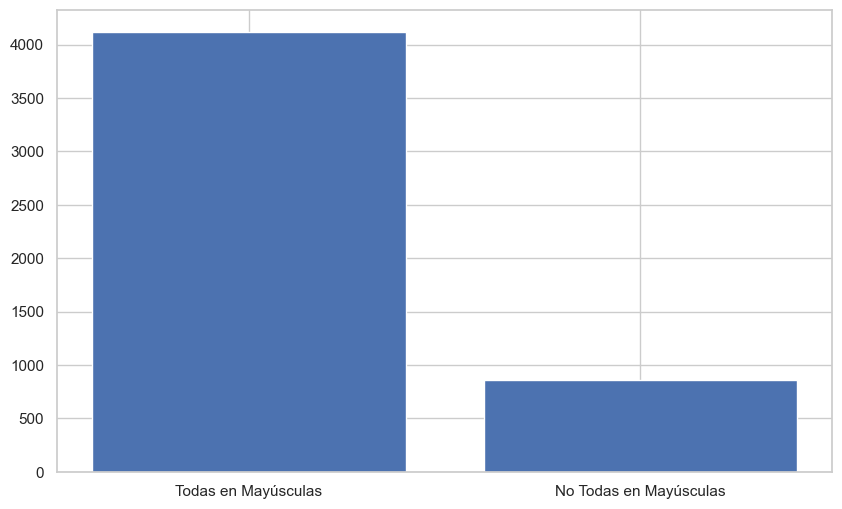

In [213]:
plt.figure(figsize=(10, 6))
labels = ['Todas en Mayúsculas', 'No Todas en Mayúsculas']
heights = [len(all_words_upper_case_views), len(not_all_words_upper_case_views)]
plt.bar(labels, heights)
plt.show()


Dado que el valor p es significativamente menor que el umbral típico de 0.05, significa que hay evidencia estadística suficiente para apoyar la hipótesis de que los títulos completamente en mayúsculas y los títulos que combinan mayúsculas y minúsculas tienen un número diferente de visitas. Sin embargo, hay que tener en cuenta la proporción de vídeos analizados, ya que aproximadamente el 82.76% de los videos (4,120 videos) están completamente en mayúsculas, frente al 17.24% de los videos (858 videos) que tienen títulos que no están completamente en mayúsculas. Sería necesario realizar más pruebas.

Aprovecho para guardar las columnas que he ido creando y actualizar el df:

In [214]:
five_minute_crafts.to_csv('updated_five_minute_crafts.csv', index=False)

# Hipótesis 5: El sentimiento del título puede influir en el número de visitas

Obtener el rango de medida del sentimiento de los títulos:

In [215]:
min_sentiment = five_minute_crafts['title_sentiment'].min()
max_sentiment = five_minute_crafts['title_sentiment'].max()
print(min_sentiment)
print(max_sentiment)

-1.0
1.0


Esto se podría interpretar así:

* Sentimiento Positivo: Un valor cercano a 1 podría significar que el título se percibe como muy positivo.
* Sentimiento Negativo: Un valor cercano a -1 podría significar que el título se percibe como muy negativo.
* Sentimiento Neutro: Un valor en el medio del rango. Entre 0 o 0.5.

Comenzar definiendo las categorías por sentimiento y analizando el promedio de visitas de cada catergoría:

In [216]:
# Definir umbrales de sentimiento
positive_range = 0.1
negative_range = -0.1

# Función para categorizar el sentimiento
def category_of_sentiment(sentiment):
    if sentiment > positive_range:
        return 'positivo'
    elif sentiment < negative_range:
        return 'negativo'
    else:
        return 'neutro'

five_minute_crafts['sentimiento_categoria'] = five_minute_crafts['title_sentiment'].apply(category_of_sentiment)

# Promedio de visitas para cada categoría
average_visits_category = five_minute_crafts.groupby('sentimiento_categoria')['total_views'].mean()
average_visits_category

sentimiento_categoria
negativo    4.420924e+06
neutro      4.511004e+06
positivo    4.238234e+06
Name: total_views, dtype: float64

/var/folders/0t/vk49bpws5t71r094zjj6qc400000gn/T/ipykernel_9617/2832383896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_sentimiento, y=promedio_visitas, palette=colores)


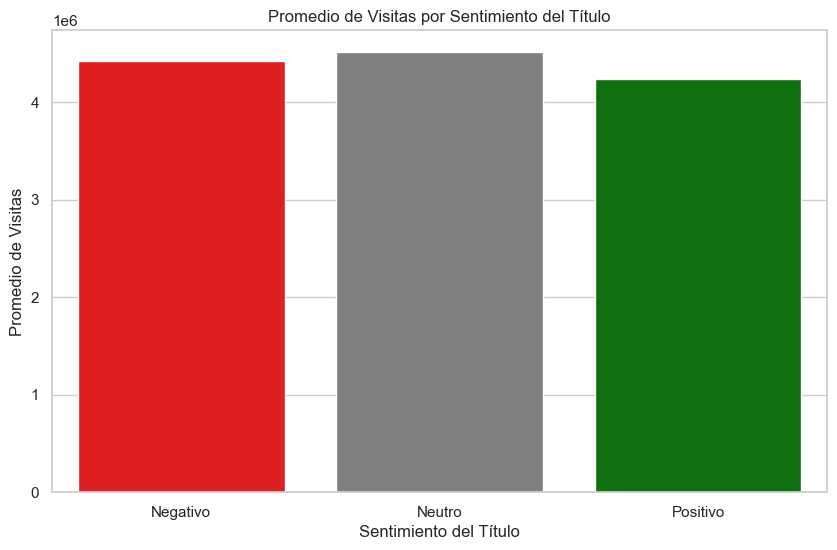

In [217]:
categorias_sentimiento = ['Negativo', 'Neutro', 'Positivo']
promedio_visitas = [4.420924e+06, 4.511004e+06, 4.238234e+06]
colores = ['red', 'gray', 'green'] 

plt.figure(figsize=(10, 6))
sns.barplot(x=categorias_sentimiento, y=promedio_visitas, palette=colores)
plt.title('Promedio de Visitas por Sentimiento del Título')
plt.xlabel('Sentimiento del Título')
plt.ylabel('Promedio de Visitas')
plt.show()

In [218]:
from scipy.stats import kruskal

grupo_negativo = five_minute_crafts[five_minute_crafts['sentimiento_categoria'] == 'negativo']['total_views']
grupo_neutro = five_minute_crafts[five_minute_crafts['sentimiento_categoria'] == 'neutro']['total_views']
grupo_positivo = five_minute_crafts[five_minute_crafts['sentimiento_categoria'] == 'positivo']['total_views']

# Realizar la prueba de Kruskal-Wallis para comparar las medias de los tres grupos (cuali(sentimiento)ycuanti(visitas))
kruskal_statistic, kruskal_p_value = kruskal(grupo_negativo, grupo_neutro, grupo_positivo)

# Realizar el cálculo de la correlación de Spearman
coeficiente_spearman, valor_p_spearman = spearmanr(five_minute_crafts['title_sentiment'], five_minute_crafts['total_views'])

print(f'Kruskal-Wallis Statistic: {kruskal_statistic}')
print(f'Kruskal-Wallis P-Value: {kruskal_p_value}')
print(f'Spearman Correlation Coefficient: {coeficiente_spearman}')
print(f'Spearman P-Value: {valor_p_spearman}')


Kruskal-Wallis Statistic: 2.8261405917255615
Kruskal-Wallis P-Value: 0.24339484059923044
Spearman Correlation Coefficient: -0.016284451143508807
Spearman P-Value: 0.250664795527542


* Prueba de Kruskal-Wallis:

  Dado que el p-valor es mayor que 0.05, no hay suficiente evidencia para concluir que existen diferencias significativas en las medianas de las visitas totales entre los distintos grupos de sentimiento del título (negativo, neutro, positivo). Esto sugiere que el sentimiento del título no tiene un impacto significativo en el número de visitas que recibe un video.

* Correlación de Spearman:

  El coeficiente de Spearman cercano a 0 sugiere una correlación muy débil entre el sentimiento del título y el total de visitas. Además, el p-valor mayor que 0.05 indica que esta correlación no es estadísticamente significativa. La dirección negativa del coeficiente indica una correlación negativa, lo que significa que a medida que el sentimiento del título se vuelve más positivo, el número de visitas tiende a disminuir ligeramente.

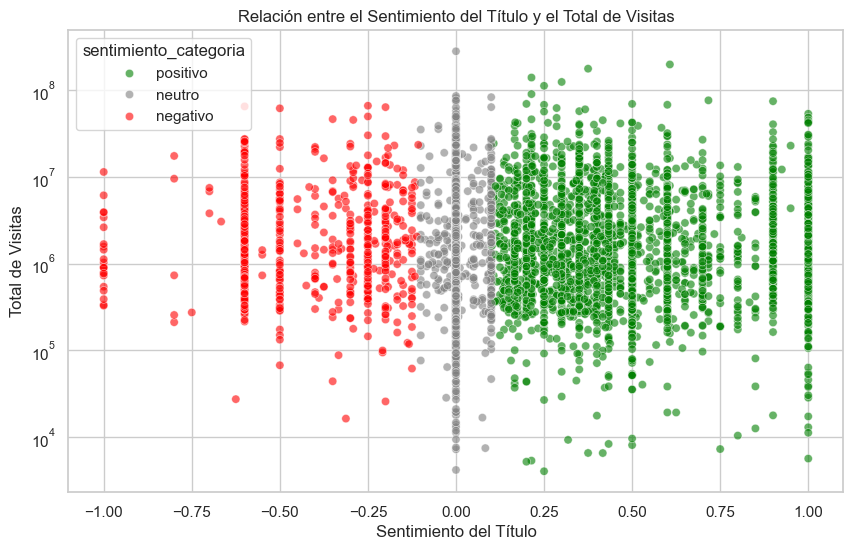

In [219]:
sns.set(style="whitegrid")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_sentiment', y='total_views', hue='sentimiento_categoria', 
                data=five_minute_crafts, palette=['green', 'gray', 'red'], alpha=0.6)

plt.title('Relación entre el Sentimiento del Título y el Total de Visitas')
plt.xlabel('Sentimiento del Título')
plt.ylabel('Total de Visitas')
plt.yscale('log')  # Usar escala logarítmica para manejar rangos amplios en visitas
plt.show()

No hay una concentración clara de puntos que indique una relación fuerte entre el sentimiento del título y el total de visitas. Todas las categorías están presentes en todo el rango de visitas. Además, hay valores atípicos en todas las categorías de sentimiento y también algunos vídeos reciben un número excepcionalmente alto de visitas.

## Conclusiones:

Las pruebas estadísticas no respalda la hipótesis de que el sentimiento del título influye significativamente en el número de visitas que recibe un video. Por lo que hay que seguir estudiando otros factores que puedan influir en el sentimiento de los vídeos. Por ejemplo, ¿puede influir el número de caracteres de los títulos con el sentimiento hacia estos?



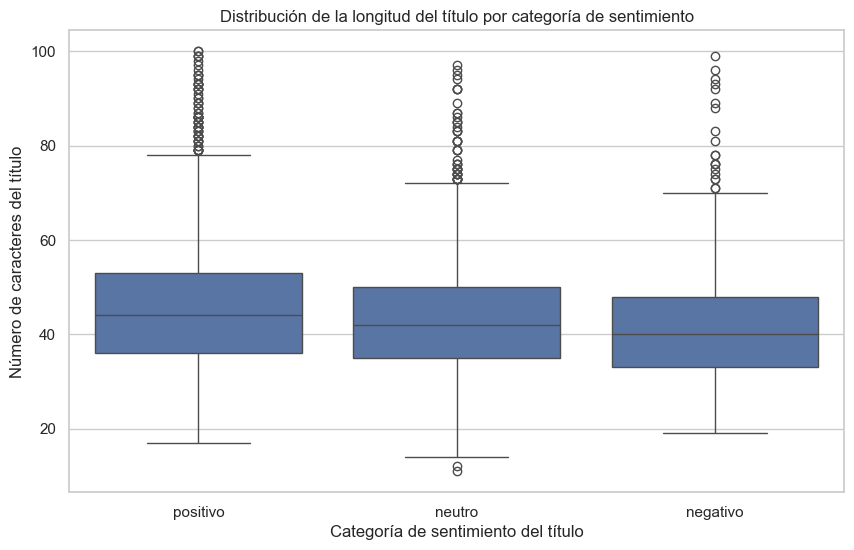

In [220]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentimiento_categoria', y='num_chars', data=five_minute_crafts)
plt.title('Distribución de la longitud del título por categoría de sentimiento')
plt.xlabel('Categoría de sentimiento del título')
plt.ylabel('Número de caracteres del título')
plt.show()

In [221]:
ks_statistic, p_value = kstest(five_minute_crafts['title_sentiment'], 'norm')
print(f"Estadístico KS: {ks_statistic}")
print(f"Valor P: {p_value}")

Estadístico KS: 0.3676175170751306
Valor P: 0.0


Como es mayor a 0.05, tiene una distribución normal. Es decir, es paramétrica. Así que voy a calcular la r de Pearson para hacer una correlación entre las variables:

In [222]:
correlation_coefficient, p_value = stats.pearsonr(five_minute_crafts['title_sentiment'], five_minute_crafts['num_chars'])

print(f'Coeficiente de correlación de Pearson: {correlation_coefficient}')
print(f'Valor p (p-value): {p_value}')

Coeficiente de correlación de Pearson: 0.05743589946809461
Valor p (p-value): 5.019520312484246e-05


Los resultados indican que existe una influencia débil pero estadísticamente significativa. Sin embargo, sigue siendo tan debil que habría que seguir estudiando otros factores.

# Conclusiones finales

Este Análisis Exploratorio de Datos (EDA) proporciona una visión inicial de la relación entre las variables de interés y las visitas de los videos de 5-Minute Crafts. Aunque se encontraron algunas correlaciones y tendencias, es importante destacar que la mayoría de estas relaciones son débiles y que la causalidad no se ha establecido.

Para una comprensión más completa se debería continuar la investigación con más pruebas como, por ejemplo, la exploración del contenido de los vídeos, así como la calidad de producción y la relevancia del contenido. También se podría comparar las visitas en YouTube con otras redes sociales donde se comparten videos de 5-Minute Crafts. Además de poner en marcha una segmentación de audiencia y analizar si diferentes palabras clave atraen a públicos específicos y si esto influye en las visitas.